# Template switching analysis

Jupyter notebook containing analyses for looking at rates of template switching in viral diversity libraries from Shin & Urbanek. Analyses correspond to !!!!!!

This notebook contains an analysis that examines rates of shared UMIs between unique barcode sequences to identify high template switching events introduced during PCR. For our bit-based barcodes, there's the potential for 20bp+ overlap between the UMI and each bit, between shared bit 1s and between shared bit 2s. In each case, we would expect to see an identical UMI split between multiple barcode sequences. 

Input for this notebook requires:
1) The flat.txt input file for each barcode diversity library of interest

Output for this notebook includes:
1. Distribution of number of unique barcodes detecter per UMI

Module and their versions used when generating figures for the paper can be found in 'requirements.txt', which is stored in our GitHub repository: !!!!!!

This code was last amended by Maddie Urbanek on !!!!!

## Notebook set-up

In [1]:
#Load in modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from itertools import product
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA
from matplotlib.ticker import PercentFormatter

In [2]:
import os
os.chdir('/home/maddie_urbanek/Desktop/flats/')

In [3]:
#Set working directory to point to barcode diversity libraries
import os
os.chdir('/Users/maddieurbanek/Desktop/revision_data/resubmission/data/barcode_diversity_libraries/')

## Import and process flat datasets

Because flat files are typically >5GB, build a function to load and condense each flat file into a unique barcode per UMI dataframe in one go:

In [3]:
def barcode_per_umi(flat_path #path to flat.txt file sent to an array (for example, flat_path=['flat_1.txt'])
                   ):
    flat=pd.read_table(f'./{flat_path}',delimiter='\t',header=None)
    flat.columns=['col1','barcode']
    
    #Split barcode into correspondent bit sequences and isolate UMI into one column
    flat[['bit1','bit2','bit3']]=flat['barcode'].str.split('-', expand=True)
    flat[['readid','umi','cbc']]=flat['col1'].str.split('_', expand=True)

    #For each UMI, count up total number of unique barcode sequences and send to table
    barcode_counts=pd.DataFrame(flat.groupby(['umi'])['barcode'].nunique())

    #Print some stats
    print('Maximum number of barcodes for a single UMI:')
    print(barcode_counts['barcode'].max())
    print('Median number of barcodes found per UMI:')
    print(barcode_counts['barcode'].median())

    return barcode_counts

Build unique barcode dataframes for all five bit-based replicates

In [ ]:
flat_path='flat_1.txt'
rep_1=barcode_per_umi(flat_path)

flat_path='flat_2.txt'
rep_2=barcode_per_umi(flat_path)

flat_path='flat_3.txt'
rep_3=barcode_per_umi(flat_path)

flat_path='flat_4.txt'
rep_4=barcode_per_umi(flat_path)

flat_path='flat_5.txt'
rep_5=barcode_per_umi(flat_path)

Process collapsed randomer flat as control for UMI collision

In [ ]:
flat=pd.read_table('collapsed_randomer_flat.txt',delimiter='\t',header=None)
flat.columns=['col1','barcode']
flat[['readid','umi','cbc']]=flat['col1'].str.split('_', expand=True)

#For each UMI, count up total number of unique barcode sequences and send to table
randomer=pd.DataFrame(flat.groupby(['umi'])['barcode'].nunique())

#Print some stats
print('Maximum number of barcodes for a single UMI:')
print(randomer['barcode'].max())
print('Median number of barcodes found per UMI:')
print(randomer['barcode'].median())

In [5]:
flat.columns=['col1','barcode']
flat[['readid','umi','cbc']]=flat['col1'].str.split('_', expand=True)

#For each UMI, count up total number of unique barcode sequences and send to table
randomer=pd.DataFrame(flat.groupby(['umi'])['barcode'].nunique())

#Print some stats
print('Maximum number of barcodes for a single UMI:')
print(randomer['barcode'].max())
print('Median number of barcodes found per UMI:')
print(randomer['barcode'].median())

Maximum number of barcodes for a single UMI:
24706
Median number of barcodes found per UMI:
1.0


## Visualization

### Plot histogram of unique barcodes per UMI as a function of UMIs per dataset

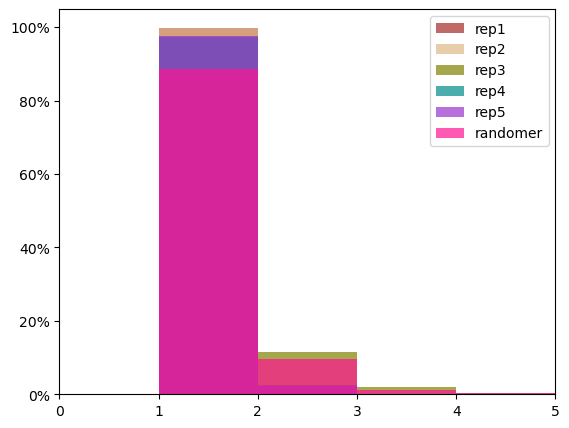

In [18]:
plt.figure().set_figheight(5)
plt.hist(rep_1['barcode'], bins=np.arange(0,rep_1['barcode'].max() + 5,1), color='brown', alpha=0.7, label='rep1', weights=np.ones(len(rep_1['barcode']))/ len(rep_1['barcode']))
plt.hist(rep_2['barcode'], bins=np.arange(0,rep_2['barcode'].max() + 5,1), color='burlywood', alpha=0.7, label='rep2', weights=np.ones(len(rep_2['barcode']))/ len(rep_2['barcode']))
plt.hist(rep_3['barcode'], bins=np.arange(0,rep_3['barcode'].max() + 5,1), color='olive', alpha=0.7, label='rep3', weights=np.ones(len(rep_3['barcode']))/ len(rep_3['barcode']))
plt.hist(rep_4['barcode'], bins=np.arange(0,rep_4['barcode'].max() + 5,1), color='darkcyan', alpha=0.7, label='rep4', weights=np.ones(len(rep_4['barcode']))/ len(rep_4['barcode']))
plt.hist(rep_5['barcode'], bins=np.arange(0,rep_5['barcode'].max() + 5,1), color='darkorchid', alpha=0.7, label='rep5', weights=np.ones(len(rep_5['barcode']))/ len(rep_5['barcode']))
plt.hist(randomer['barcode'], bins=np.arange(0,randomer['barcode'].max() + 5,1), color='deeppink', alpha=0.7, label='randomer', weights=np.ones(len(randomer['barcode']))/ len(randomer['barcode']))


plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel='Barcodes per UMI'
plt.xlim([0,5])
#plt.yscale('log')
plt.legend()
plt.savefig('template_switching.pdf', bbox_inches='tight', format='pdf')
plt.show()

Print percentage of UMIs with more than 1 barcode per dataset

In [24]:
print("Percentage of UMIs for rep 1 with >1 barcode:")
print(len(rep_1[rep_1.barcode>1])/len(rep_1)*100)
print()
print("Percentage of UMIs for rep 2 with >1 barcode:")
print(len(rep_2[rep_2.barcode>1])/len(rep_2)*100)
print()
print("Percentage of UMIs for rep 3 with >1 barcode:")
print(len(rep_3[rep_3.barcode>1])/len(rep_3)*100)
print()
print("Percentage of UMIs for rep 4 with >1 barcode:")
print(len(rep_4[rep_4.barcode>1])/len(rep_4)*100)
print()
print("Percentage of UMIs for rep 5 with >1 barcode:")
print(len(rep_5[rep_5.barcode>1])/len(rep_5)*100)
print()
print("Percentage of UMIs for randomer with >1 barcode:")
print(len(randomer[randomer.barcode>1])/len(randomer)*100)
print()

Percentage of UMIs for rep 1 with >1 barcode:
0.13108902472990605

Percentage of UMIs for rep 2 with >1 barcode:
0.202871365038355

Percentage of UMIs for rep 3 with >1 barcode:
14.049292363243685

Percentage of UMIs for rep 4 with >1 barcode:
2.776667812973834

Percentage of UMIs for rep 5 with >1 barcode:
2.3424338663450484

Percentage of UMIs for randomer with >1 barcode:
11.295705733859645



## Process experimental slice datasets